Mounted at /content/drive
   photon height   latitude
0      398.14233  27.228242
1      391.40497  27.228248
2      391.65402  27.228248
3      391.85645  27.228248
4      391.81010  27.228254
   photon height  latitude
0       0.762227 -1.922833
1      -0.178431 -1.919921
2      -0.143659 -1.919919
3      -0.115396 -1.919918
4      -0.121867 -1.916966


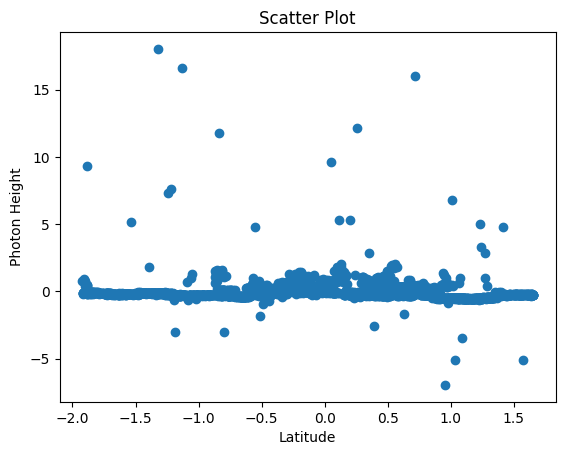

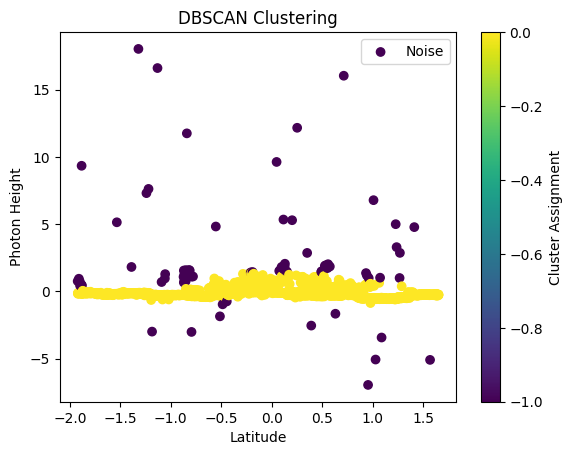

Insufficient number of labels for silhouette score calculation.
Overall Silhouette Score: 0.6025871953248549


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/drive')

# Specify the path to the CSV file
csv_path = '/content/drive/MyDrive/INTERNSHIP/ICESAT_1.csv'

# Read the dataset from the CSV file
d1 = pd.read_csv(csv_path)

# Select the required columns for analysis
req_col = ["photon height", "latitude"]

# Print the first few rows of the selected columns
print(d1[req_col].head())

# Standardize the features using StandardScaler
z = StandardScaler()
d1[["photon height", "latitude"]] = z.fit_transform(d1[["photon height", "latitude"]])

# Print the standardized features
print(d1[["photon height", "latitude"]].head())

# Create a scatter plot of the data points
plt.scatter(d1["latitude"], d1["photon height"])
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("Scatter Plot")
plt.show()

# Perform DBSCAN clustering
db1 = DBSCAN(eps=0.3, min_samples=25).fit(d1[req_col])

# Update the labels in the DataFrame
d1["assignments"] = db1.labels_

# Create a list of cluster labels for legend
labsList = ["Noise"] + ["Cluster" + str(i) for i in range(1, len(set(db1.labels_)))]

# Create a scatter plot of the data points colored by cluster assignments
plt.scatter(d1["latitude"], d1["photon height"], c=db1.labels_)
plt.ylabel("Photon Height")
plt.xlabel("Latitude")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Assignment")
plt.legend(labsList)
plt.show()

# Select clustered data points for silhouette score calculation
d1_clustered = d1.loc[d1["assignments"] >= 0]

# Check if there are at least two unique labels in the clustered data
unique_labels = d1_clustered["assignments"].unique()
if len(unique_labels) < 2:
    print("Insufficient number of labels for silhouette score calculation.")
else:
    # Calculate the silhouette score for clustered data points
    silhouette = silhouette_score(d1_clustered[["latitude", "photon height"]], d1_clustered["assignments"])
    print("Silhouette Score for Clustered Data Points:", silhouette)

# Calculate the overall silhouette score for the dataset
silhouette_overall = silhouette_score(d1[["latitude", "photon height"]], d1["assignments"])
print("Overall Silhouette Score:", silhouette_overall)
